In [1]:
#Load following packages 
import numpy as np
import pandas as pd
import scipy as sy
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pylab as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os

C:\Users\c25020629\individual_project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Show Dataset

In [2]:
#Download water quality dataset 
path = kagglehub.dataset_download("mssmartypants/water-quality")
print("Dataset downloaded to:", path)
csv_file = os.path.join(path, "waterQuality1.csv")
wq = pd.read_csv(csv_file)

#View dataset
wq

Dataset downloaded to: C:\Users\c25020629\.cache\kagglehub\datasets\mssmartypants\water-quality\versions\3


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


# Initial Data Processing

In [4]:
#Set index and change column name to ID
wq.insert(0, 'ID', range(1, len(wq) + 1))
wq.set_index('ID', inplace=True)
wq

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
ID,,,,,,,,,,,,,,,,,,,,,
1,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
2,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
3,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
4,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
5,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7996,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7997,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1


In [5]:
#Check for any missing values (NaN)/ inconsistencies in data 
print(wq.isna().sum())
print(wq["is_safe"].unique())

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64
['1' '0' '#NUM!']


In [6]:
#Determine number of undefined values in "is_safe" column
class_proportions = wq['is_safe'].value_counts(normalize = True)
print(class_proportions * 100)

is_safe
0        88.561070
1        11.401425
#NUM!     0.037505
Name: proportion, dtype: float64


In [7]:
#Remove rows that are neither 0 or 1 in the "is_safe" column - only 3% of data is undefined - okay to remove rows
wq = wq[~wq.eq("#NUM!").any(axis=1)]

In [8]:
#Check data types - must all be numeric 
print(wq.dtypes)

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object


In [9]:
#Convert 'ammonia' column to float, invalid entries become NaN
wq['ammonia'] = pd.to_numeric(wq['ammonia'], errors='coerce')

#Convert 'is_safe' column to integer
wq['is_safe'] = pd.to_numeric(wq['is_safe'], errors='coerce')


C:\Users\c25020629\AppData\Local\Temp\ipykernel_18940\3519989087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wq['ammonia'] = pd.to_numeric(wq['ammonia'], errors='coerce')
C:\Users\c25020629\AppData\Local\Temp\ipykernel_18940\3519989087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wq['is_safe'] = pd.to_numeric(wq['is_safe'], errors='coerce')


In [10]:
#Check data types again - must all be numeric 
print(wq.dtypes)

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object


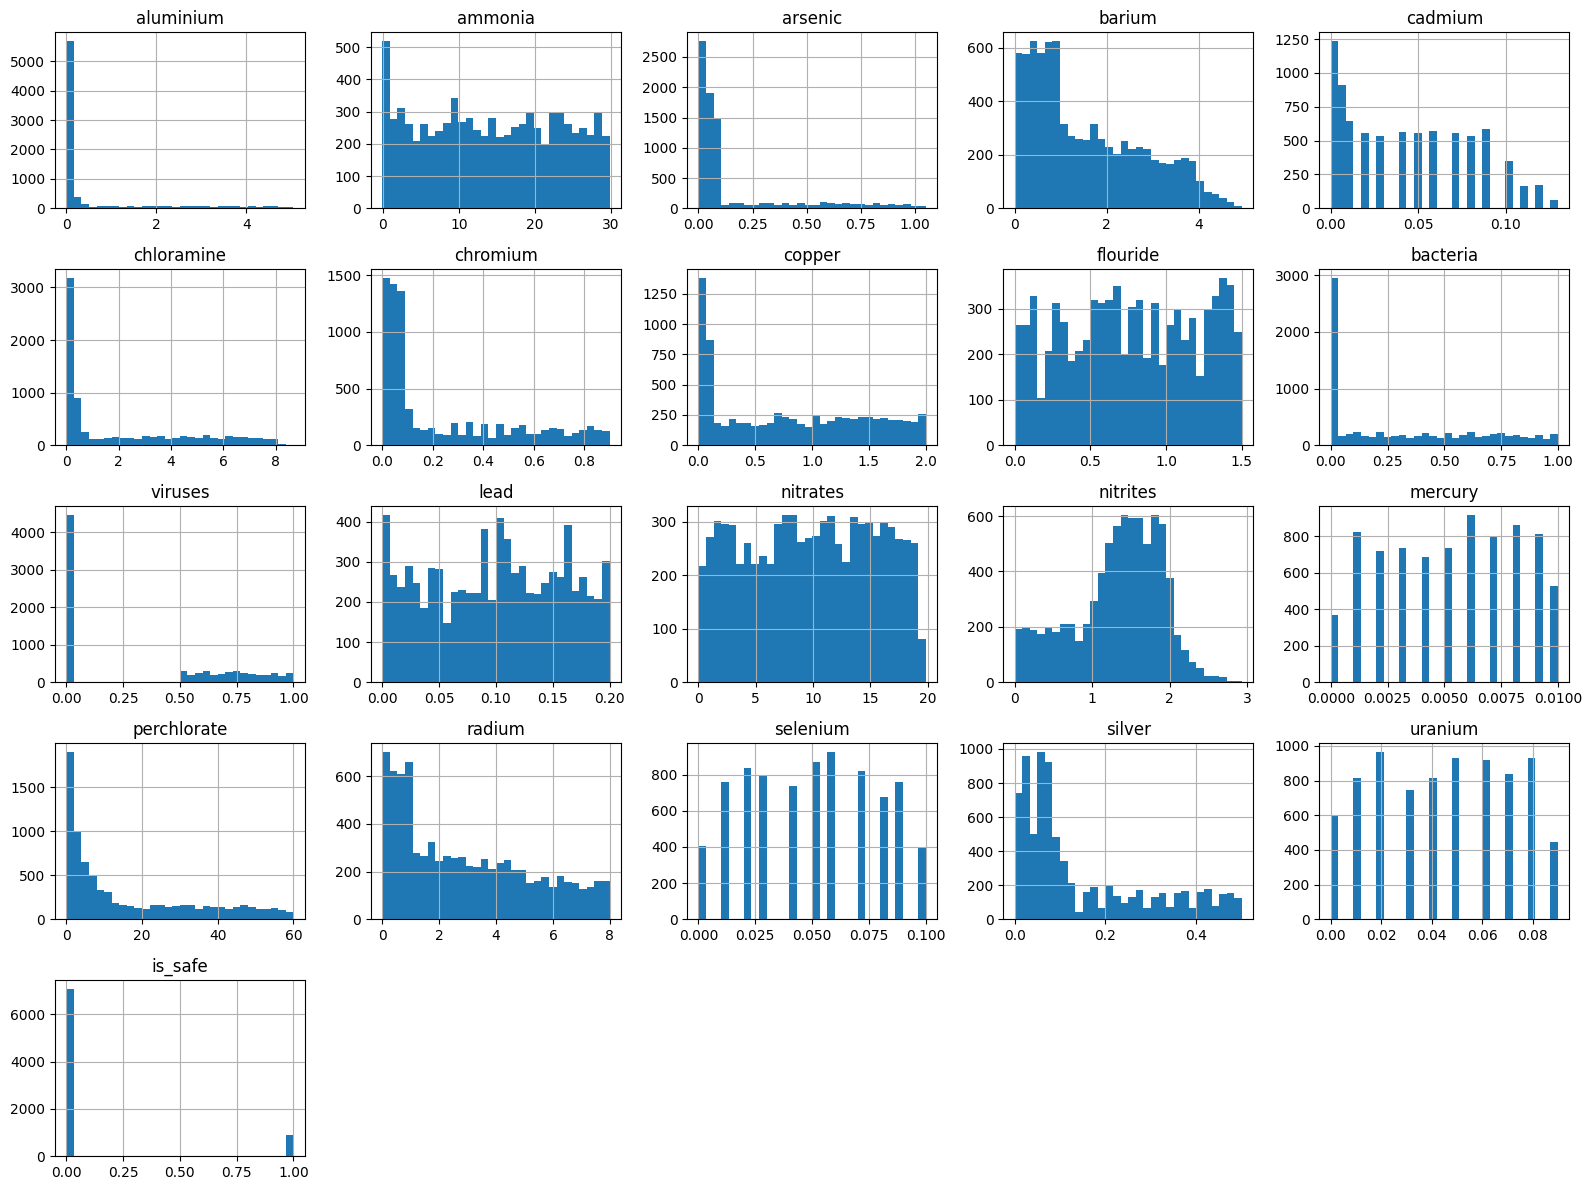

In [11]:
#Data visualistion - histograms
wq.hist(figsize=(16, 12), bins=30)
plt.tight_layout()
plt.show()

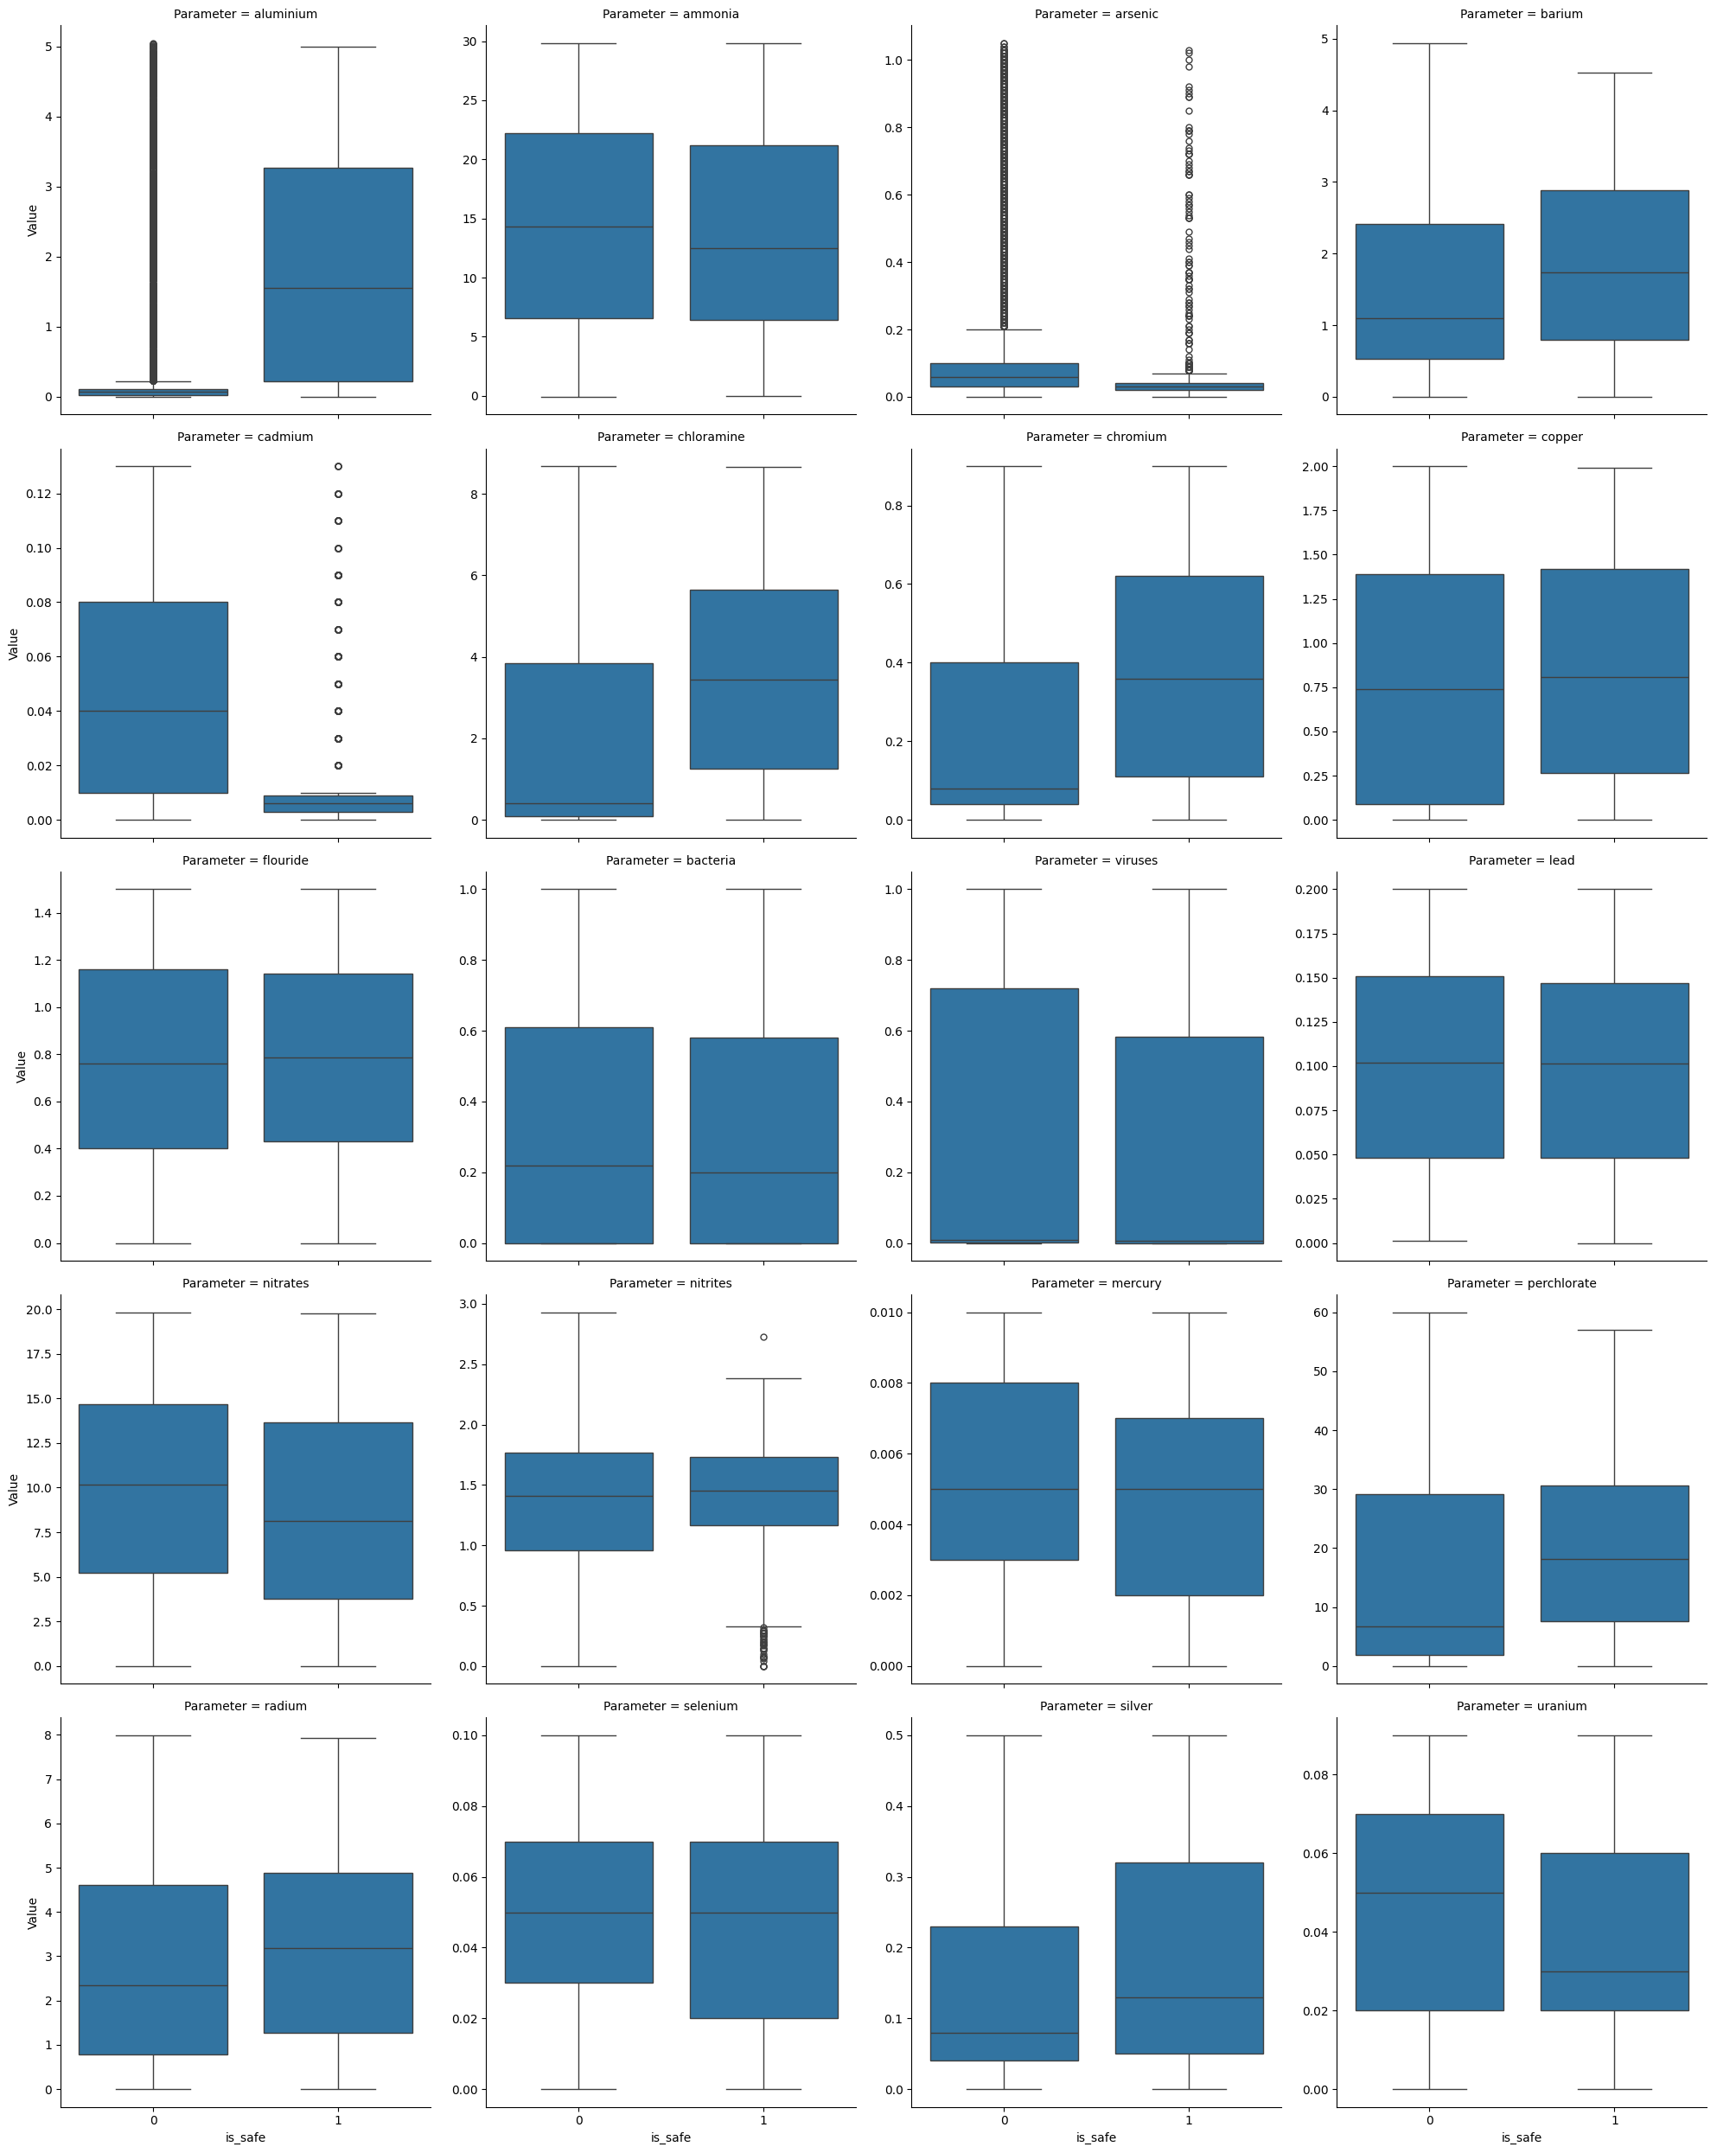

In [33]:
#Data visualisation - boxplots
wq_melted = wq.melt(id_vars = 'is_safe', var_name = 'Parameter', value_name = 'Value')

sns.catplot(
    x = 'is_safe', y = 'Value', col = 'Parameter',
    data = wq_melted, kind = 'box', col_wrap = 4, sharey = False
)

plt.show()

# Model Building

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy: 0.9591496456857024


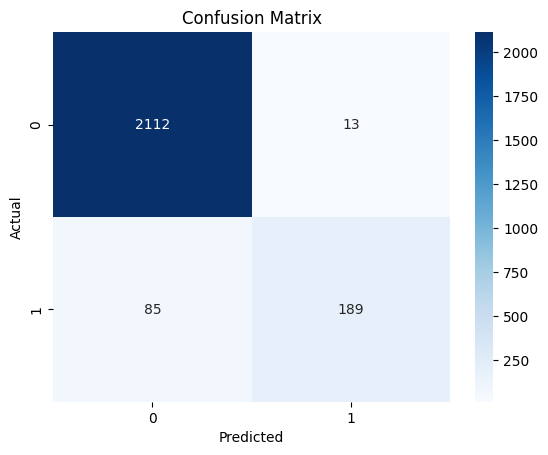

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2125
           1       0.94      0.69      0.79       274

    accuracy                           0.96      2399
   macro avg       0.95      0.84      0.89      2399
weighted avg       0.96      0.96      0.96      2399



In [47]:
##Random Forest Model 1##
#Asign feature and target variables
X = wq.drop('is_safe', axis=1) #feature 
y = wq['is_safe'] #targets 

#Split dataset into training and test datasets 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42, stratify = y
)

#Run random forest analysis
rf = RandomForestClassifier(
    n_estimators = 100,
    random_state = 42,
    max_depth = None,
    min_samples_split = 2,
    n_jobs = -1,
    verbose = 1
)

rf.fit(X_train, y_train)

#Generate model prediction
y_pred = rf.predict(X_test)

#Determine model accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

#Generate confusion matrix and classifiction report
cm1 = confusion_matrix(y_test, y_pred, labels=rf.classes_)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

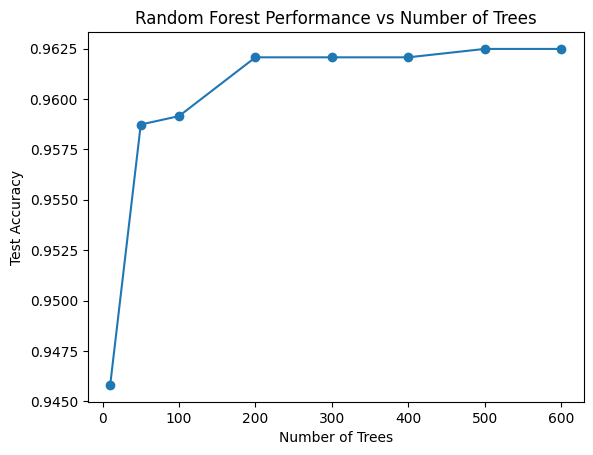

In [50]:
#Test n_estimator value performance 
tree_counts = [10, 50, 100, 200, 300, 400, 500, 600]
accuracies = []

for n in tree_counts:
    rf_temp = RandomForestClassifier(
        n_estimators=n,
        random_state=42,
        max_depth= None,
        n_jobs=-1,
    )
    
    rf_temp.fit(X_train, y_train)
    y_pred_temp = rf_temp.predict(X_test)
    acc = accuracy_score(y_test, y_pred_temp)
    accuracies.append(acc)

plt.figure()
plt.plot(tree_counts, accuracies, marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Test Accuracy")
plt.title("Random Forest Performance vs Number of Trees")
plt.show()


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 422 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 422 tasks      | elapsed:    0.2s
[Parallel(n_jobs=14)]: Done 500 out of 500 | elapsed:    0.2s finished


Accuracy: 0.954375


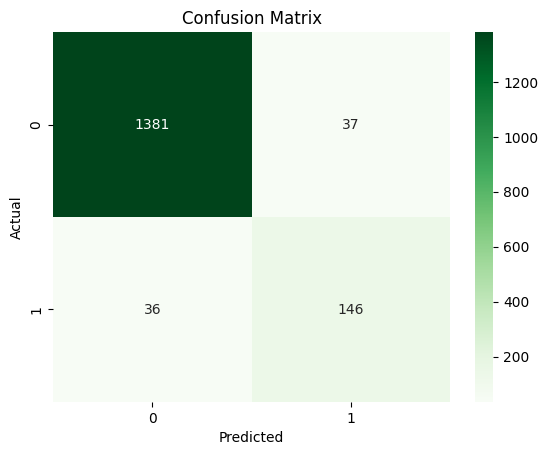

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1418
           1       0.80      0.80      0.80       182

    accuracy                           0.95      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.95      0.95      0.95      1600



In [53]:
##Random Forest Model 2##
#Improvements to model 1:
    #Reduce test size 
    #Change max_depth from None to 10 
    #number of estimaters increased to 500 after testing 
    #class_weight = balanced 

#Asign feature and target variables
X = wq.drop('is_safe', axis=1) #feature 
y = wq['is_safe'] #targets 

#Split dataset into training and test datasets 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Run random forest analysis
rf = RandomForestClassifier(
    n_estimators = 500,
    class_weight = 'balanced',
    random_state = 42,
    max_depth = 10,
    min_samples_split = 2,
    n_jobs = -1,
    verbose = 1
)

rf.fit(X_train, y_train)

#Generate model prediction
y_pred = rf.predict(X_test)

#Determine model accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

#Generate confusion matrix and classifiction report
cm1 = confusion_matrix(y_test, y_pred, labels=rf.classes_)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens',
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

# Final Model Results

In [56]:
##List feature importance## 
#Extract feature importance from random forest model 2
importances = rf.feature_importances_
features = X.columns

#Create dataframe of feature importance 
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
print(feat_imp)

        Feature  Importance
0     aluminium    0.181771
4       cadmium    0.156988
2       arsenic    0.079957
15  perchlorate    0.074271
5    chloramine    0.068825
18       silver    0.062243
10      viruses    0.042722
13     nitrites    0.042359
19      uranium    0.041331
6      chromium    0.037492
12     nitrates    0.035955
16       radium    0.030560
9      bacteria    0.027772
7        copper    0.023727
1       ammonia    0.022550
11         lead    0.021804
3        barium    0.020118
17     selenium    0.010714
8      flouride    0.010387
14      mercury    0.008455


C:\Users\c25020629\AppData\Local\Temp\ipykernel_18940\1464715951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')


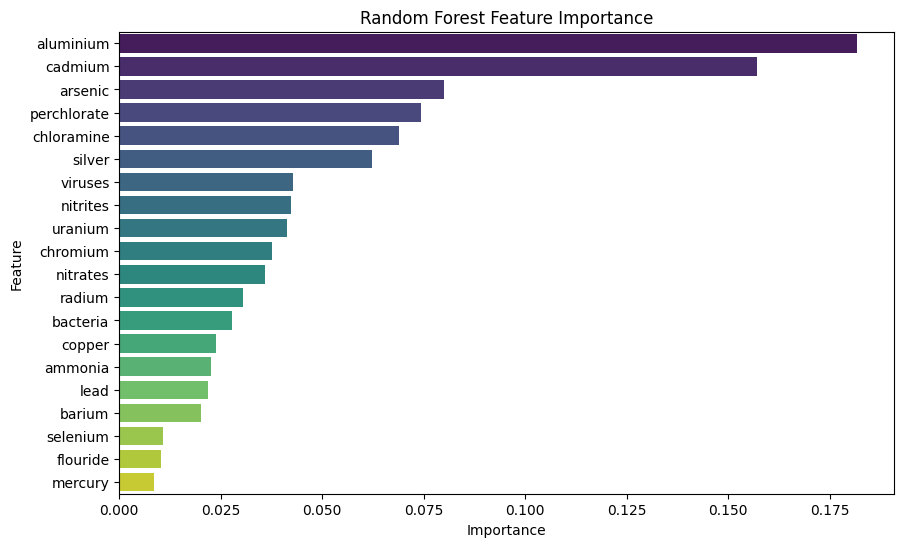

In [57]:
#Visualistion of feature importance - barplot 
plt.figure(figsize = (10,6))
sns.barplot(x = 'Importance', y = 'Feature', data = feat_imp, palette = 'viridis')
plt.title('Random Forest Feature Importance')
plt.show()
